In [1]:
# this sets up basic packages
import numpy as np
import pandas as pd
import astropy.units as u
import astropy.cosmology.units as cu

# this sets up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# this sets up astropy
from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import pixel_to_skycoord
from astropy.utils.data import get_pkg_data_filename
from astropy.coordinates import SkyCoord, Angle, match_coordinates_sky, Distance
from astropy.cosmology import Planck15 as cosmo
from astropy.table import Table, unique

from regions import Regions, CircleSkyRegion

Sep 4, 2024: for now, we don't have the catalogs we need yet, so let's do the pipeline based on Hollis' catalog.

In [3]:
large_catalog = '/Users/ngbinh/Downloads/COSMOS-Web_supercatalog_v0.7.fits'

In [4]:
hdu_list = fits.open(large_catalog)
hdu_list.info()

Filename: /Users/ngbinh/Downloads/COSMOS-Web_supercatalog_v0.7.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    802   913253R x 155C   [K, D, D, 3A, D, 4A, L, D, D, D, D, D, D, D, D, 5D, 5D, 5D, L, D, D, D, D, D, D, D, D, 5D, 5D, 5D, L, D, D, D, D, D, D, D, D, 5D, 5D, 5D, L, D, D, D, D, D, D, D, D, 5D, 5D, 5D, L, D, D, D, D, D, D, D, D, 5D, 5D, 5D, L, D, D, D, D, D, D, D, D, 5D, 5D, 5D, L, K, E, E, K, L, K, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, L, K, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


In [5]:
cat_data = hdu_list[1].data

In [6]:
ras = cat_data['ra']
decs = cat_data['dec']

# this creates a SkyCoord object of all the objects' RAs and Decs, so we can loop through them later.
all_objects = SkyCoord(ra=ras*u.degree, dec=decs*u.degree)

In [26]:
### from the arrays of RA and Dec, pick a random pair of RA and Dec and find their neighbors within a specified
### aperture. do this 1000 times, then save the number of neighbors from each time into an array. we're gonna do this 
### for different apertures within range from 1 to 15 arcsecs (the radius we used for our 9 QG analysis).

# this creates an array of search radii to loop over
radii = np.arange(5, 15+1, 2)

# this creates an empty array to save the number of neighbors found within each search radius
number_by_radius = np.zeros(np.size(radii))

# this is the mega loop.
# first, we pick a search radius
for q in range(np.size(radii)):
    search_radius = radii[q]
    print(search_radius)
    
    # this creates an empty array to save the number of neighbors for each run with each search radius
    number_of_neighbors = np.zeros(1000)
    
    # this for-loop is to run the code 1000 times
    for i in range(1000):
        # use np.random.uniform to find a random RA and Dec within our given boundaries
        random_ras = np.random.uniform(np.min(ras), np.max(ras))
        random_decs = np.random.uniform(np.min(decs), np.max(decs))
    
        # turn the randomly generated RA and Dec into coords to find neighbors for
        random_coords = SkyCoord(ra=random_ras*u.degree, dec=random_decs*u.degree)
    
        # now, we search for all the neighbors of these random coordinates, within a given distance
        d2d = random_coords.separation(all_objects)
        catalog_mask = d2d < search_radius*u.arcsec
        
        # this saves the number of neighbors identified in each run into the array we've made above
        number_of_neighbors[i] = np.size(ras[catalog_mask])

    # this saves the average of identified neighbors within each search radius
    number_by_radius[q] = np.mean(number_of_neighbors)

5
7
9
11
13
15


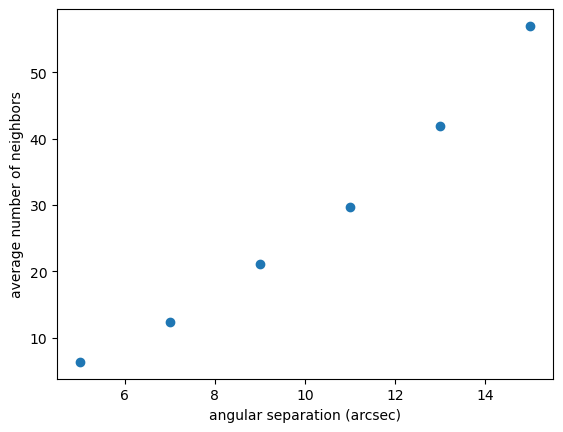

In [30]:
fig, ax = plt.subplots()
plt.plot(radii, number_by_radius, 'o')
ax.set(xlabel='angular separation (arcsec)', ylabel='average number of neighbors')
plt.show()

In [32]:
number_by_radius

array([ 6.317, 12.278, 21.127, 29.702, 41.969, 57.027])